In [19]:
from __future__ import print_function

import argparse
import numpy as np

import cloudpickle
import tensorflow as tf
import pandas as pd

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

In [2]:
# force tensorflow to work on CPU as GPU doesn't work for now
tf.config.set_visible_devices([], 'GPU')

In [3]:
tf.debugging.set_log_device_placement(True)
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)

Executing op MatMul in device /job:localhost/replica:0/task:0/device:CPU:0
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [4]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''


batch_size = 256
epochs = 4
num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets

# TODO : use mnist.load_data to create x_train, y_train, x_test, y_test
(x_train, y_train), (x_test, y_test) = mnist.load_data()



In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
import matplotlib.pyplot as plt


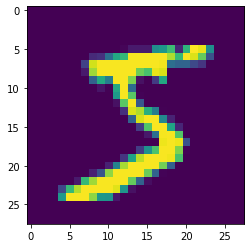

In [7]:
plt.imshow(x_train[0, :, :])

In [8]:
# TODO : reshape your data according to keras setting and define an
# input_shape argument you will feed the model
if K.image_data_format() == 'channels_first':
    x_train = np.expand_dims(x_train, axis = 1)
    x_test = np.expand_dims(x_test, axis = 1)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = np.expand_dims(x_train, axis = 3)
    x_test = np.expand_dims(x_test, axis = 3)
    input_shape = (img_rows, img_cols, 1)

In [9]:
input_shape

(28, 28, 1)

In [10]:
# TODO : convert X_train and X_test to float and normalise them

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [11]:
# TODO : convert class vectors to binary class matrices using
# keras.utils.to_categorical
y_train = tf.keras.utils.to_categorical(
    y_train, num_classes=10
)

y_test = tf.keras.utils.to_categorical(
    y_test, num_classes=10
)

In [12]:
# TODO : Define a sequential model with layers :

# Conv2D(64, (3, 3), activation='relu', input_shape=input_shape)
# MaxPooling2D(pool_size=(2, 2)
# Conv2D(64, kernel_size=(3, 3), activation='relu')
# MaxPooling2D(pool_size=(2, 2))
# Dropout(0.25)
# Flatten()
# Dense(128, activation='relu')
# Dense(num_classes, activation='softmax')

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
                 ])

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost

In [13]:

# TODO : Compile model with categorical cross entropy loss, optimizer Adam and 
# accuracy metric

model.compile(optimizer = "Adam",
              loss = "categorical_crossentropy" ,
              metrics = ["accuracy"]
                 )

Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0


In [14]:
# TODO : fit the model
model.fit(x_train, y_train ,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test ))

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Ide

 53/235 [=====>........................] - ETA: 13s - loss: 0.7418 - accuracy: 0.7924Executing op __inference_train_function_808 in device /job:localhost/replica:0/task:0/device:CPU:0


 98/235 [===========>..................] - ETA: 10s - loss: 0.4924 - accuracy: 0.8610Executing op __inference_train_function_808 in device /job:localhost/replica:0/task:0/device:CPU:0


143/235 [=================>............] - ETA: 6s - loss: 0.3796 - accuracy: 0.8917Executing op __inference_train_function_808 in device /job:localhost/replica:0/task:0/device:CPU:0


188/235 [=======================>......] - ETA: 3s - loss: 0.3147 - accuracy: 0.9097Executing op __inference_train_function_808 in device /job:localhost/replica:0/task:0/device:CPU:0


233/235 [============================>.] - ETA: 0s - loss: 0.2755 - accuracy: 0.9207Executing op __inference_train_function_808 in device /job:localhost/replica:0/task:0/device:CPU:0


234/235 [============================>.] - ETA: 0s - loss: 0.2748 - accuracy: 0.9209Executing op __inference_train_function_808 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Execu

 54/235 [=====>........................] - ETA: 13s - loss: 0.0808 - accuracy: 0.9771Executing op __inference_train_function_808 in device /job:localhost/replica:0/task:0/device:CPU:0


 99/235 [===========>..................] - ETA: 10s - loss: 0.0793 - accuracy: 0.9769Executing op __inference_train_function_808 in device /job:localhost/replica:0/task:0/device:CPU:0


144/235 [=================>............] - ETA: 6s - loss: 0.0771 - accuracy: 0.9773Executing op __inference_train_function_808 in device /job:localhost/replica:0/task:0/device:CPU:0


189/235 [=======================>......] - ETA: 3s - loss: 0.0743 - accuracy: 0.9780Executing op __inference_train_function_808 in device /job:localhost/replica:0/task:0/device:CPU:0


234/235 [============================>.] - ETA: 0s - loss: 0.0714 - accuracy: 0.9787Executing op __inference_train_function_808 in device /job:localhost/replica:0/task:0/device:CPU:0


Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_tes

 61/235 [======>.......................] - ETA: 13s - loss: 0.0532 - accuracy: 0.9841Executing op __inference_train_function_808 in device /job:localhost/replica:0/task:0/device:CPU:0


106/235 [============>.................] - ETA: 9s - loss: 0.0522 - accuracy: 0.9843 Executing op __inference_train_function_808 in device /job:localhost/replica:0/task:0/device:CPU:0


151/235 [==================>...........] - ETA: 6s - loss: 0.0518 - accuracy: 0.9846Executing op __inference_train_function_808 in device /job:localhost/replica:0/task:0/device:CPU:0


196/235 [========================>.....] - ETA: 2s - loss: 0.0510 - accuracy: 0.9851Executing op __inference_train_function_808 in device /job:localhost/replica:0/task:0/device:CPU:0


234/235 [============================>.] - ETA: 0s - loss: 0.0506 - accuracy: 0.9851Executing op __inference_train_function_808 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470

Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

 68/235 [=======>......................] - ETA: 12s - loss: 0.0453 - accuracy: 0.9859Executing op __inference_train_function_808 in device /job:localhost/replica:0/task:0/device:CPU:0


113/235 [=============>................] - ETA: 9s - loss: 0.0449 - accuracy: 0.9860Executing op __inference_train_function_808 in device /job:localhost/replica:0/task:0/device:CPU:0


158/235 [===================>..........] - ETA: 5s - loss: 0.0436 - accuracy: 0.9864Executing op __inference_train_function_808 in device /job:localhost/replica:0/task:0/device:CPU:0


203/235 [========================>.....] - ETA: 2s - loss: 0.0419 - accuracy: 0.9871Executing op __inference_train_function_808 in device /job:localhost/replica:0/task:0/device:CPU:0


234/235 [============================>.] - ETA: 0s - loss: 0.0416 - accuracy: 0.9875Executing op __inference_train_function_808 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470

Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 

In [17]:
# TODO : store the result of model. evaluate in a variable score
score = model.evaluate(x_test, y_test)

# TODO : log the loss and score as metric to mlflow

print('Test loss:', score[0])
print('Test accuracy:', score[1])

# TODO : log the model to mlflow

Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op M

Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
 66/313 [=====>........................] - ETA: 0s - loss: 0.0426 - accuracy: 0.9844Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_

Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
144/313 [============>.................] - ETA: 0s - loss: 0.0432 - accuracy: 0.9846Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_

222/313 [====================>.........] - ETA: 0s - loss: 0.0352 - accuracy: 0.9873Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_

Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_test_function_1470 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing 